# Portfolio 4: Which factors affect higher education student's performance at Near East University?

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('DATA (1).csv')
df.rename(columns={'STUDENT ID':'Student ID', 'COURSE ID':'Course ID', 'GRADE':'Grade',
                   '1':'Age', '2':'Sex', '3':'Graduated high-school type', '4':'Scholarship type', '5':'Additional work',
                   '6':'Regular artistic/sports activity', '7':'Marital status', '8':'Total salary',
                   '9':'Transportation type', '10':'Accomodation type', '11':'Mother\'s education',
                   '12':'Father\'s education', '13':'Number of siblings', '14':'Parental status', '15':'Mother\'s occupation',
                   '16':'Father\'s occupation', '17':'Weekly study hours', '18':'Reading frequency(non-scientific)',
                   '19':'Reading frequency(scientific)', '20':'Seminars attendance',
                   '21':'Projects\' impact', '22':'Classes attendance', 
                   '23':'Midterm exams preparation 1', '24':'Midterm exams preparation 2', 
                   '25':'Taking notes in classes', '26':'Listening in classes', '27':'Discussion\'s efficiency',
                   '28':'Flip-classroom', '29':'Last semester cumulative GPA', '30':'Last semester expected cumulative GPA'},
           inplace=True)

### Meta Data
The data was collected from surveying 145 students from the Atatürk Faculty of Education and Faculty of Engineering of Near East University students in 2019. Data source: [Higher Education Students Performance Evaluation - UCI](https://archive.ics.uci.edu/dataset/856/higher+education+students+performance+evaluation)

|Feature Name|Description|
|--------------|-----------|
|Student ID||
|Age|1: 18-21, 2: 22-25, 3: > 26|
|Sex|1: female, 2: male|
|Graduated high-school type|1: private, 2: state, 3: other|
|Scholarship type|1: None, 2: 25%, 3: 50%, 4: 75%, 5: Full|
|Addtional work|1: Yes, 2: No|
|Regular artistic/sports activity|1: Yes, 2: No|
|Marital status|1: Yes, 2: No|
|Total salary|1: USD 135-200, 2: USD 201-270, 3: USD 271-340, 4: USD 341-410, 5: > 410|
|Transportation type|1: Bus, 2: Private car/taxi, 3: Bicycle, 4: Other|
|Accomodation type|1: rental, 2: dormitory, 3: with family, 4: other|
|Mother's education|1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.|
|Father's education|1: primary school, 2: secondary school, 3: high school, 4: university, 5: MSc., 6: Ph.D.|
|Number of siblings|1: 1, 2:, 2, 3: 3, 4: 4, 5: >= 5 |
|Parental status|1: married, 2: divorced, 3: widowed|
|Mother's occupation|1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employed, 6: other|
|Father's occupation|1: retired, 2: housewife, 3: government officer, 4: private sector employee, 5: self-employed, 6: other|
|Weekly study hours|1: None, 2: < 5 hours, 3: 6-10 hours, 4: 11-20 hours, 5: > 20 hours|
|Reading frequency (non-scientific)|1: None, 2: Sometimes, 3: Often|
|Reading frequency (scientific)|1: None, 2: Sometimes, 3: Often|
|Seminars attendance|1: Yes, 2: No|
|Projects' impact|1: positive, 2: negative, 3: neutral|
|Classes attendance|1: always, 2: sometimes, 3: never|
|Midterm exams preparation 1|1: alone, 2: with friends, 3: not applicable|
|Midterm exams preparation 2|1: closest date to the exam, 2: regularly during the semester, 3: never|
|Taking notes in classes|1: never, 2: sometimes, 3: always|
|Listening in classes|1: never, 2: sometimes, 3: always|
|Discussion's efficiency|1: never, 2: sometimes, 3: always|
|Flip-classroom|1: not useful, 2: useful, 3: not applicable|
|Last semester cumulative GPA|1: < 2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: > 3.49|
|Last semester expected cumulative GPA|1: < 2.00, 2: 2.00-2.49, 3: 2.50-2.99, 4: 3.00-3.49, 5: > 3.49|
|Course ID||
|Grade|0: Fail, 1: DD, 2: DC, 3: CC, 4: CB, 5: BB, 6: BA, 7: AA|

### Data cleaning
1. Checking for null valuesThere are two features concerning the subject's marital status: `Marital status` and `Parental status`. Marital status determines whether the student is married, while Parental status assumes all students went through marriage.:

In [2]:
df.isnull().sum()

Student ID                               0
Age                                      0
Sex                                      0
Graduated high-school type               0
Scholarship type                         0
Additional work                          0
Regular artistic/sports activity         0
Marital status                           0
Total salary                             0
Transportation type                      0
Accomodation type                        0
Mother's education                       0
Father's education                       0
Number of siblings                       0
Parental status                          0
Mother's occupation                      0
Father's occupation                      0
Weekly study hours                       0
Reading frequency(non-scientific)        0
Reading frequency(scientific)            0
Seminars attendance                      0
Projects' impact                         0
Classes attendance                       0
Midterm exa

There is no null value in the dataset.  

2. Determining confusing/illogical feature(s):

There are two features concerning the subject's marital status: `Marital status` and `Parental status` in the dataset. `Marital status` determines whether the student is married, while `Parental status` assumes all students are in or went through marriage. Therefore, `Parental status` should be omitted from the dataset.

In [3]:
clean_df = df.drop('Parental status', axis=1)

3. Detecting outliers:

[Text(0, 0, 'Age'),
 Text(1, 0, 'Sex'),
 Text(2, 0, 'Graduated HS type'),
 Text(3, 0, 'Scholarship type'),
 Text(4, 0, 'Additional work'),
 Text(5, 0, 'Extracurricular activity'),
 Text(6, 0, 'Marital status'),
 Text(7, 0, 'Total salary'),
 Text(8, 0, 'Transportation type'),
 Text(9, 0, 'Accomodation type'),
 Text(10, 0, "Mother's education"),
 Text(11, 0, "Father's education"),
 Text(12, 0, 'Number of siblings'),
 Text(13, 0, "Mother's occupation"),
 Text(14, 0, "Father's occupation"),
 Text(15, 0, 'Weekly study hours'),
 Text(16, 0, 'Reading frequency(non-scientific)'),
 Text(17, 0, 'Reading frequency(scientific)'),
 Text(18, 0, 'Seminars attendance'),
 Text(19, 0, "Projects' impact"),
 Text(20, 0, 'Classes attendance'),
 Text(21, 0, 'Midterm exams prep 1'),
 Text(22, 0, 'Midterm exams prep 2'),
 Text(23, 0, 'Taking notes in classes'),
 Text(24, 0, 'Listening in classes'),
 Text(25, 0, "Discussion's efficiency"),
 Text(26, 0, 'Flip-classroom'),
 Text(27, 0, 'Last-sem CGPA'),
 Text(28

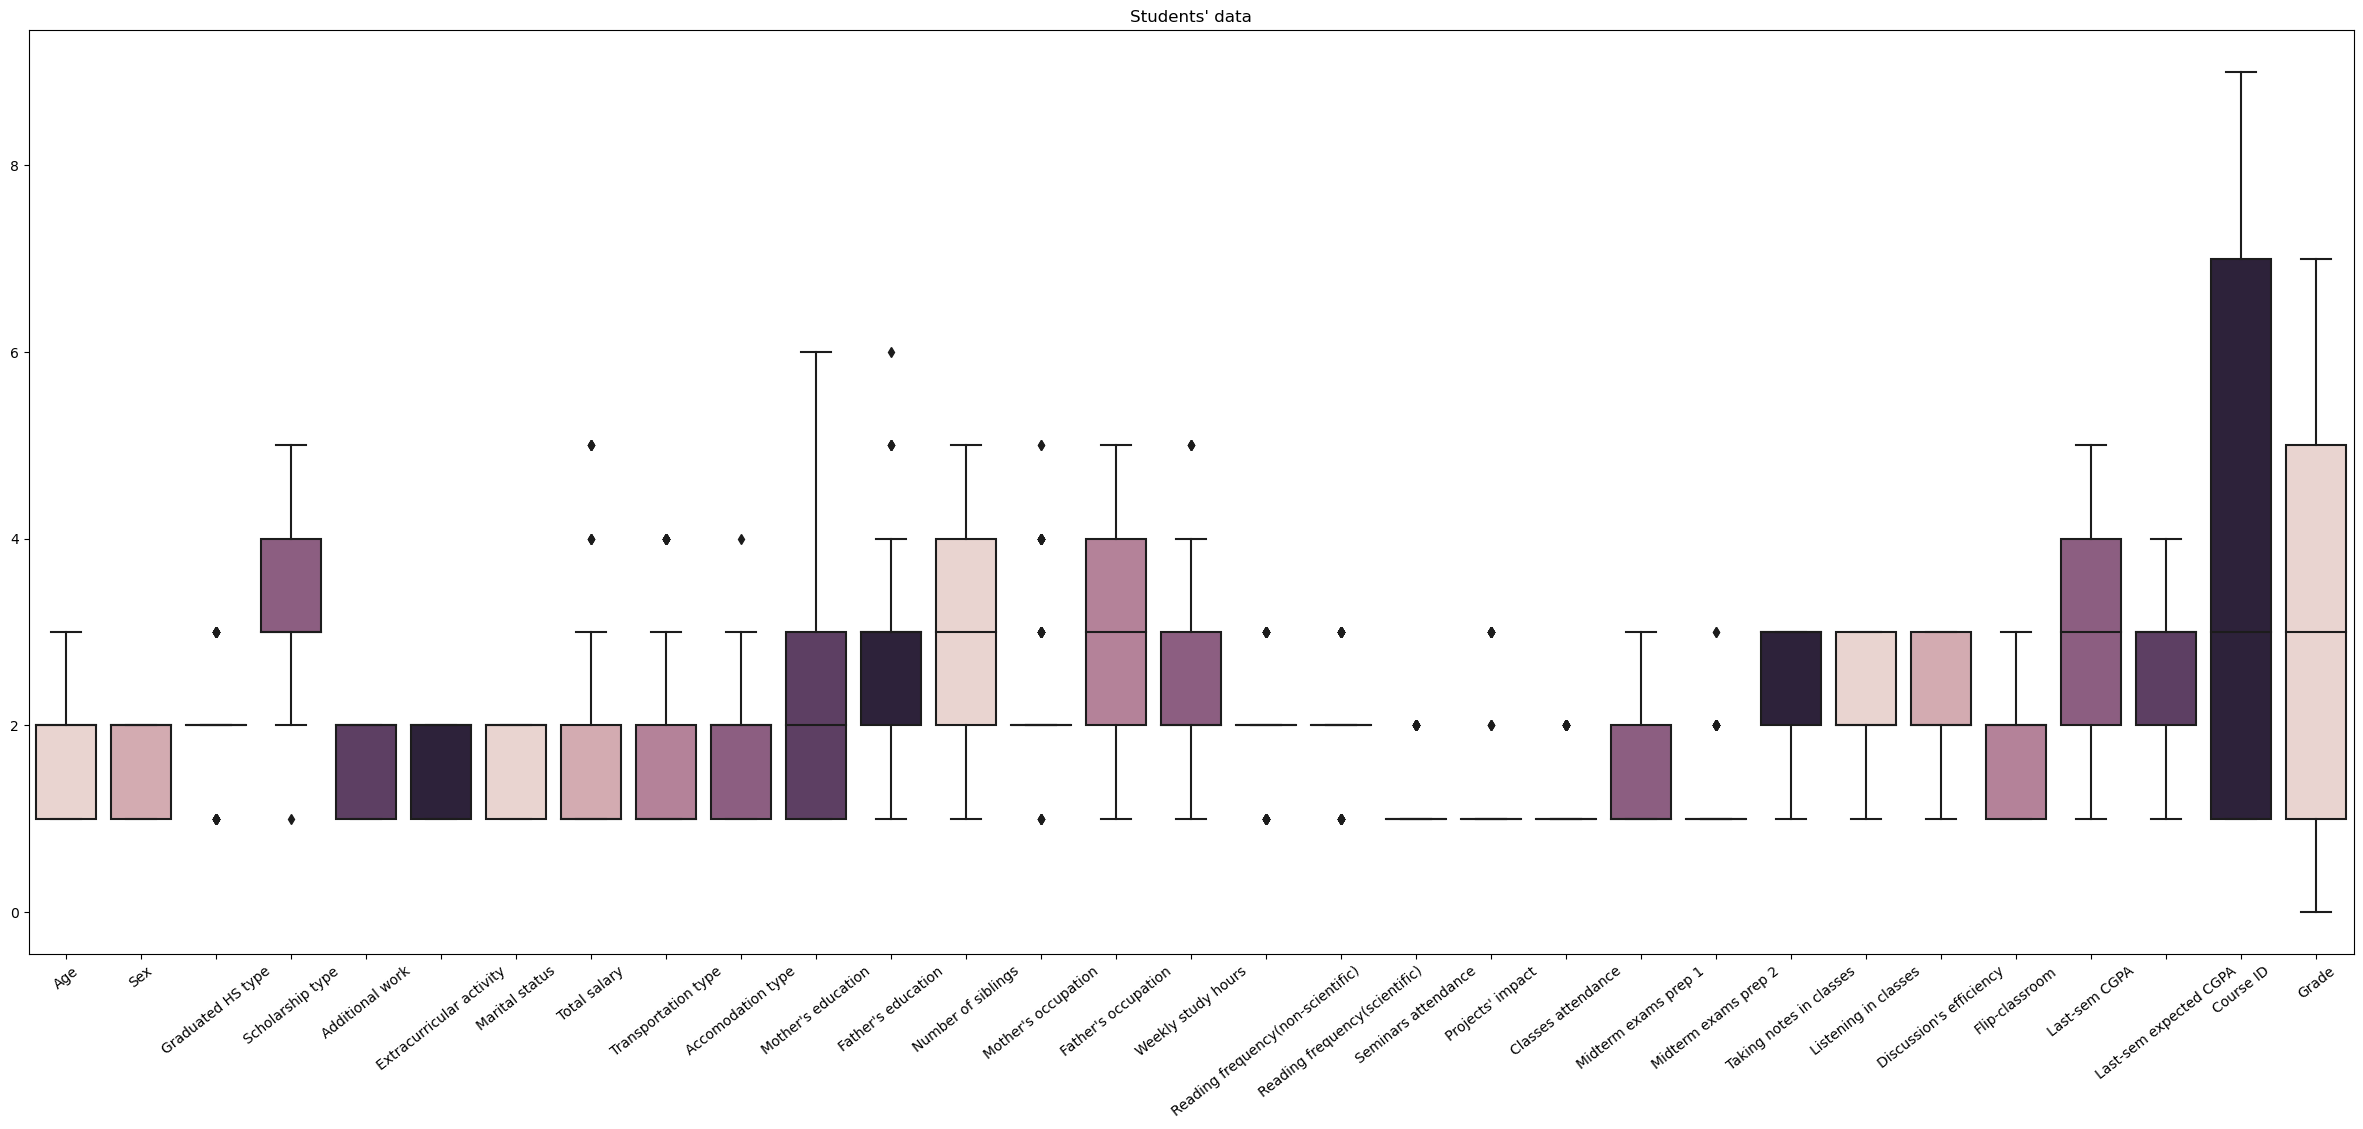

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

color1 = sns.cubehelix_palette() #pink
color2 = sns.cubehelix_palette(rot=-.2, as_cmap=True) #blue
color3 = sns.diverging_palette(220, 20, as_cmap=True) #red-blue
color4 = sns.cubehelix_palette(start=2, as_cmap=True) #helix
color5 = sns.cubehelix_palette(rot=-.2)
color6 = sns.diverging_palette(220, 20)
color7 = sns.cubehelix_palette(start=2)

box_df = clean_df
box_df = box_df.rename(columns={'Graduated high-school type':'Graduated HS type',
                                'Regular artistic/sports activity':'Extracurricular activity',
                                'Midterm exams preparation 1':'Midterm exams prep 1',
                                'Midterm exams preparation 2':'Midterm exams prep 2',
                                'Last semester cumulative GPA':'Last-sem CGPA', 
                                'Last semester expected cumulative GPA':'Last-sem expected CGPA'})

plt.figure(figsize = (30, 12))
chart = sns.boxplot(data = box_df, palette = color1)
plt.title('Students\' data')
chart.set_xticklabels(chart.get_xticklabels(), rotation=38)

According to the box plot, it is apparent that roughly half of the columns has outliers. However, there are some cases where we cannot easily delete outliers since they are true outliers, which represent natural variations in the population. In this dataset, only outliers in `Accomodation type` and `Midterm exams preparation 2` should be deleted as they are examples of poor sampling. Listed accomodation already covered the most common types and there is rarely any student who does not prepare for exam.

In [5]:
clean_df = clean_df.drop(clean_df.index[(clean_df['Accomodation type'] == 4)]) 
clean_df = clean_df.drop(clean_df.index[(clean_df['Midterm exams preparation 2']) == 3])
clean_df

,Student ID,Age,Sex,Graduated high-school type,Scholarship type,Additional work,Regular artistic/sports activity,Marital status,Total salary,Transportation type,...,Midterm exams preparation 1,Midterm exams preparation 2,Taking notes in classes,Listening in classes,Discussion's efficiency,Flip-classroom,Last semester cumulative GPA,Last semester expected cumulative GPA,Course ID,Grade
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
5,STUDENT6,2,2,2,3,2,2,2,2,1,...,1,1,1,2,1,2,4,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


### Exploratory data analysis

Text(0.5, 1.0, "Students' performance data correlation matrix")

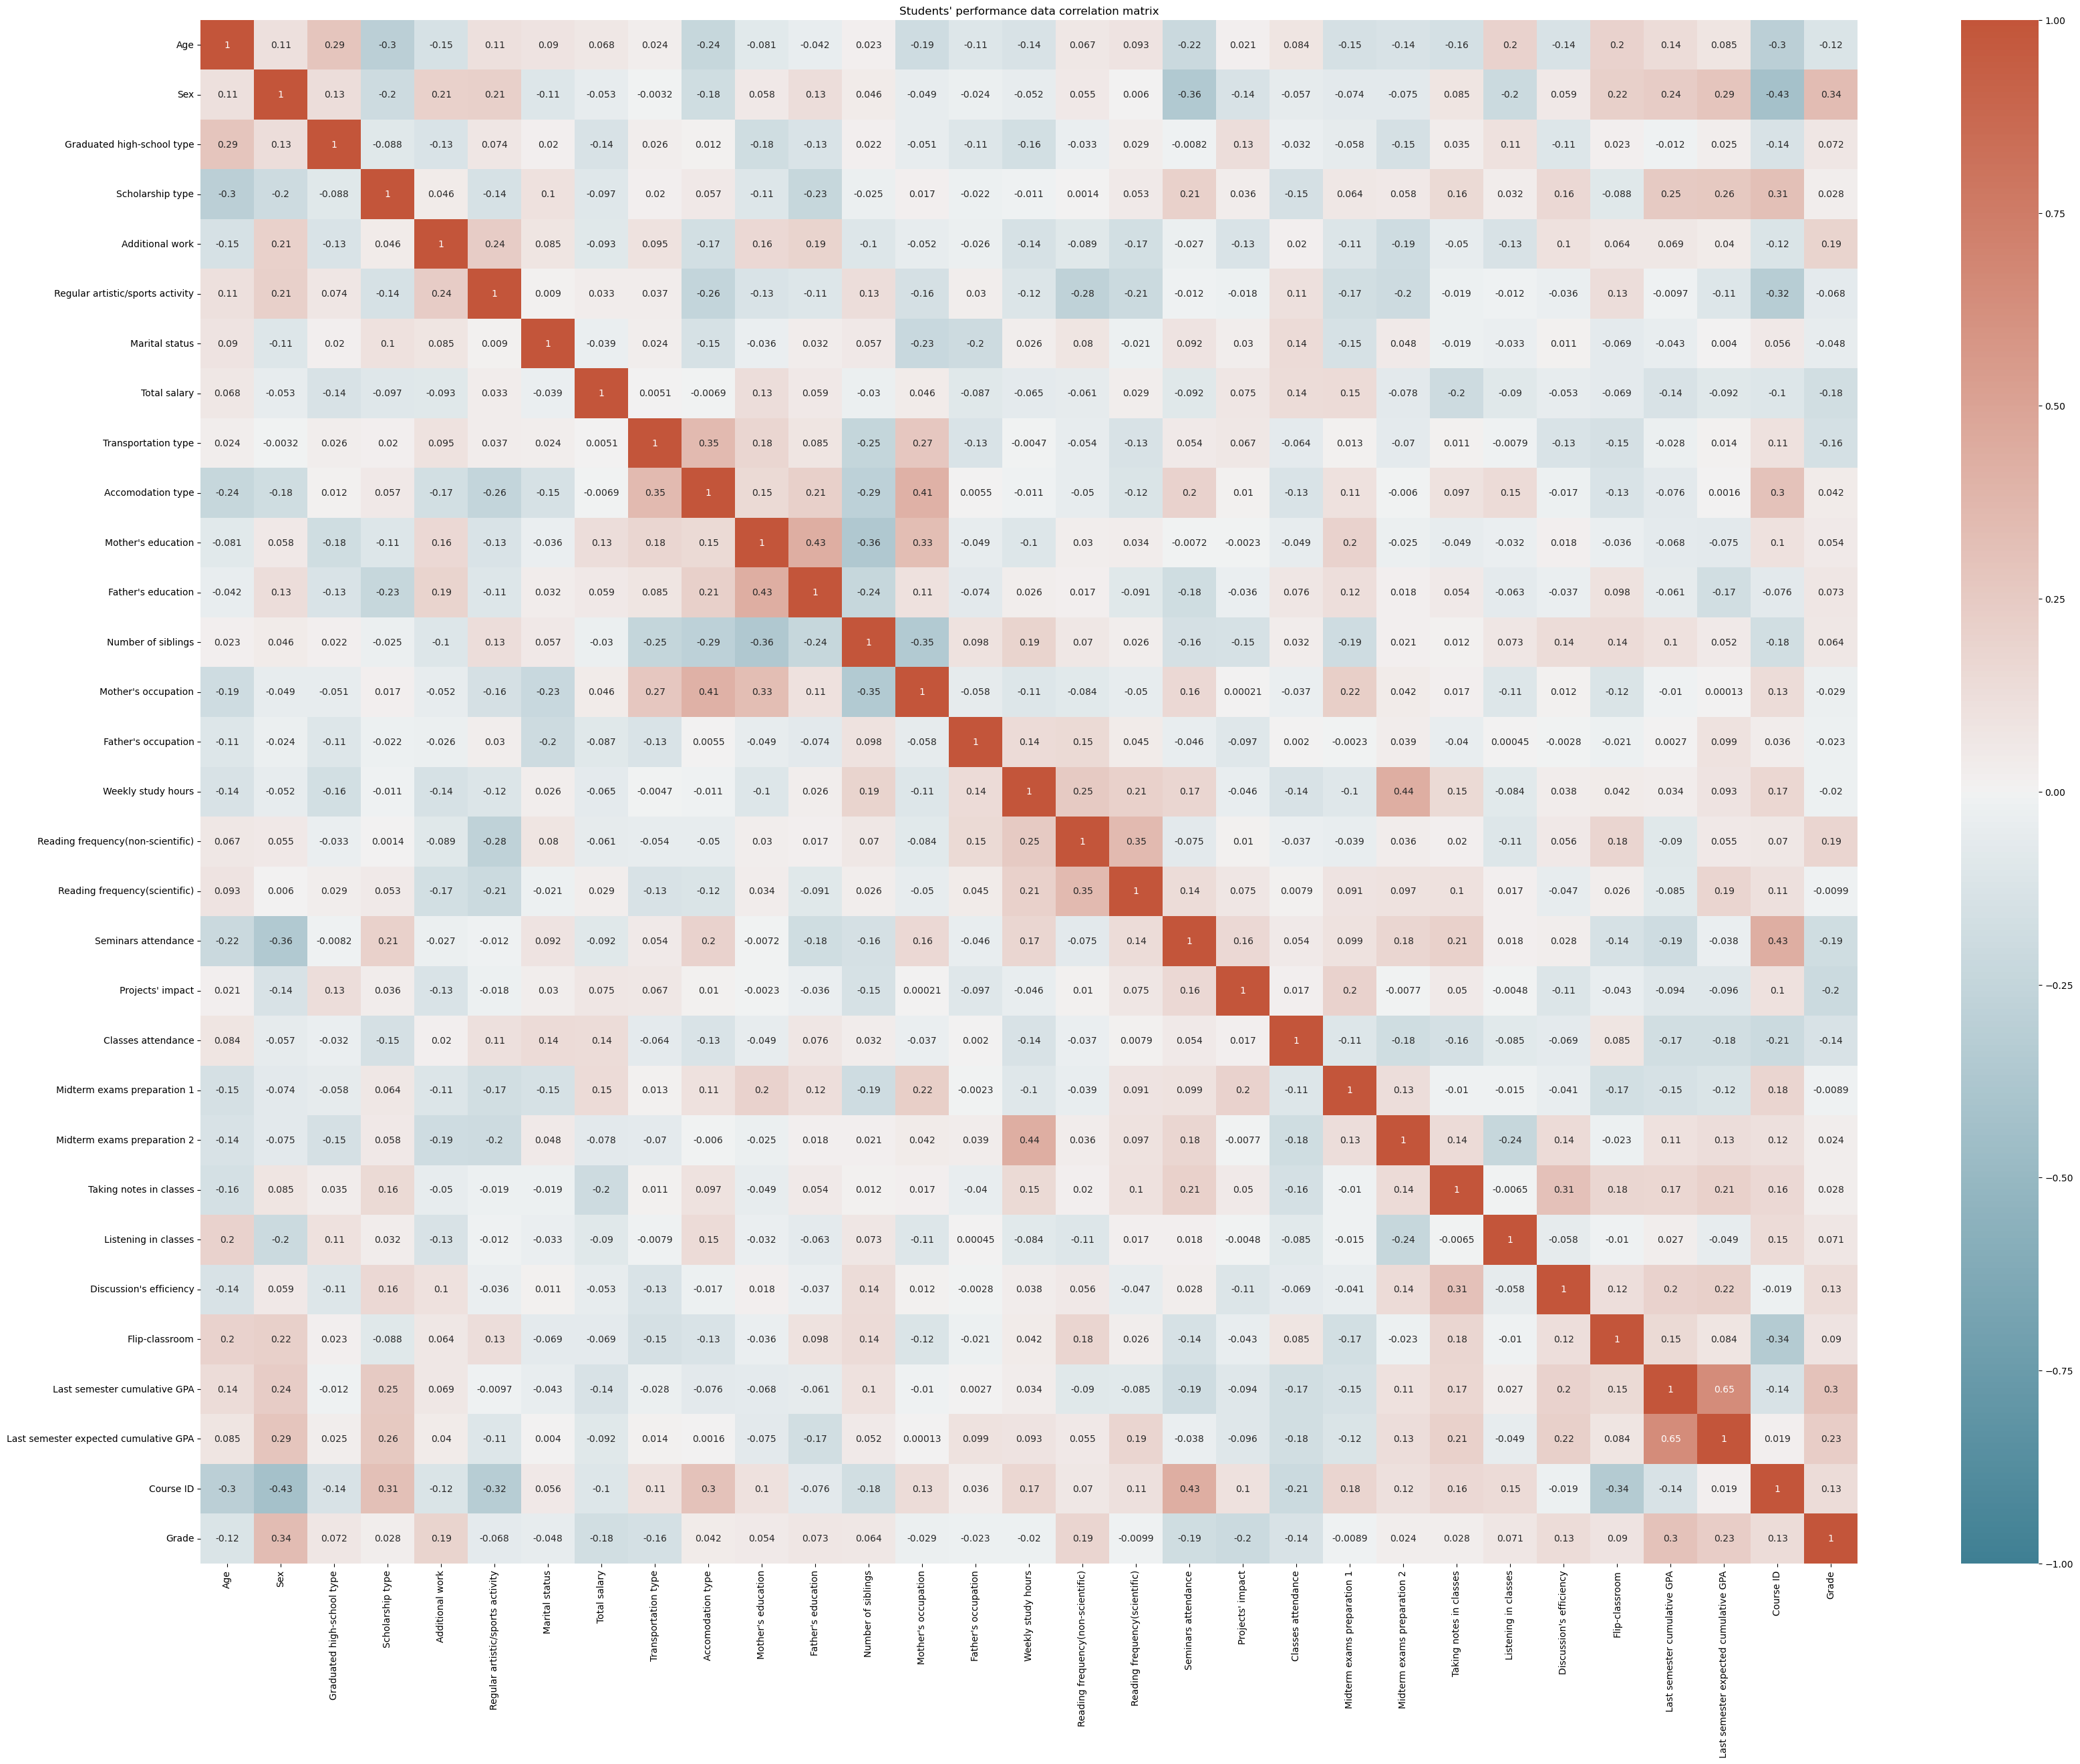

In [6]:
#Data correlation matrix
plt.figure(figsize = (40, 30))
sns.heatmap(clean_df.corr(), vmin=-1, vmax=1, center=0, annot = True, cmap= color3)
plt.title('Students\' performance data correlation matrix')

`Grade` is moderately correlated with `Sex`, `Additional work`, `Total salary`, `Transportation type`, `Reading frequency (non-scientific)`, `Seminars attendance`, `Project's impact`, `Classes attendance`, `Discussion's efficiency`, `Last semester cumulative GPA`, `Last semester expected cumulative GPA` with correlation coefficients higher than 0.12 and lower than 0.4. This suggests that these 12 features possibly directly affect the students' performance at Near East University.

In [7]:
#Data for visualisation
viz_dat = clean_df

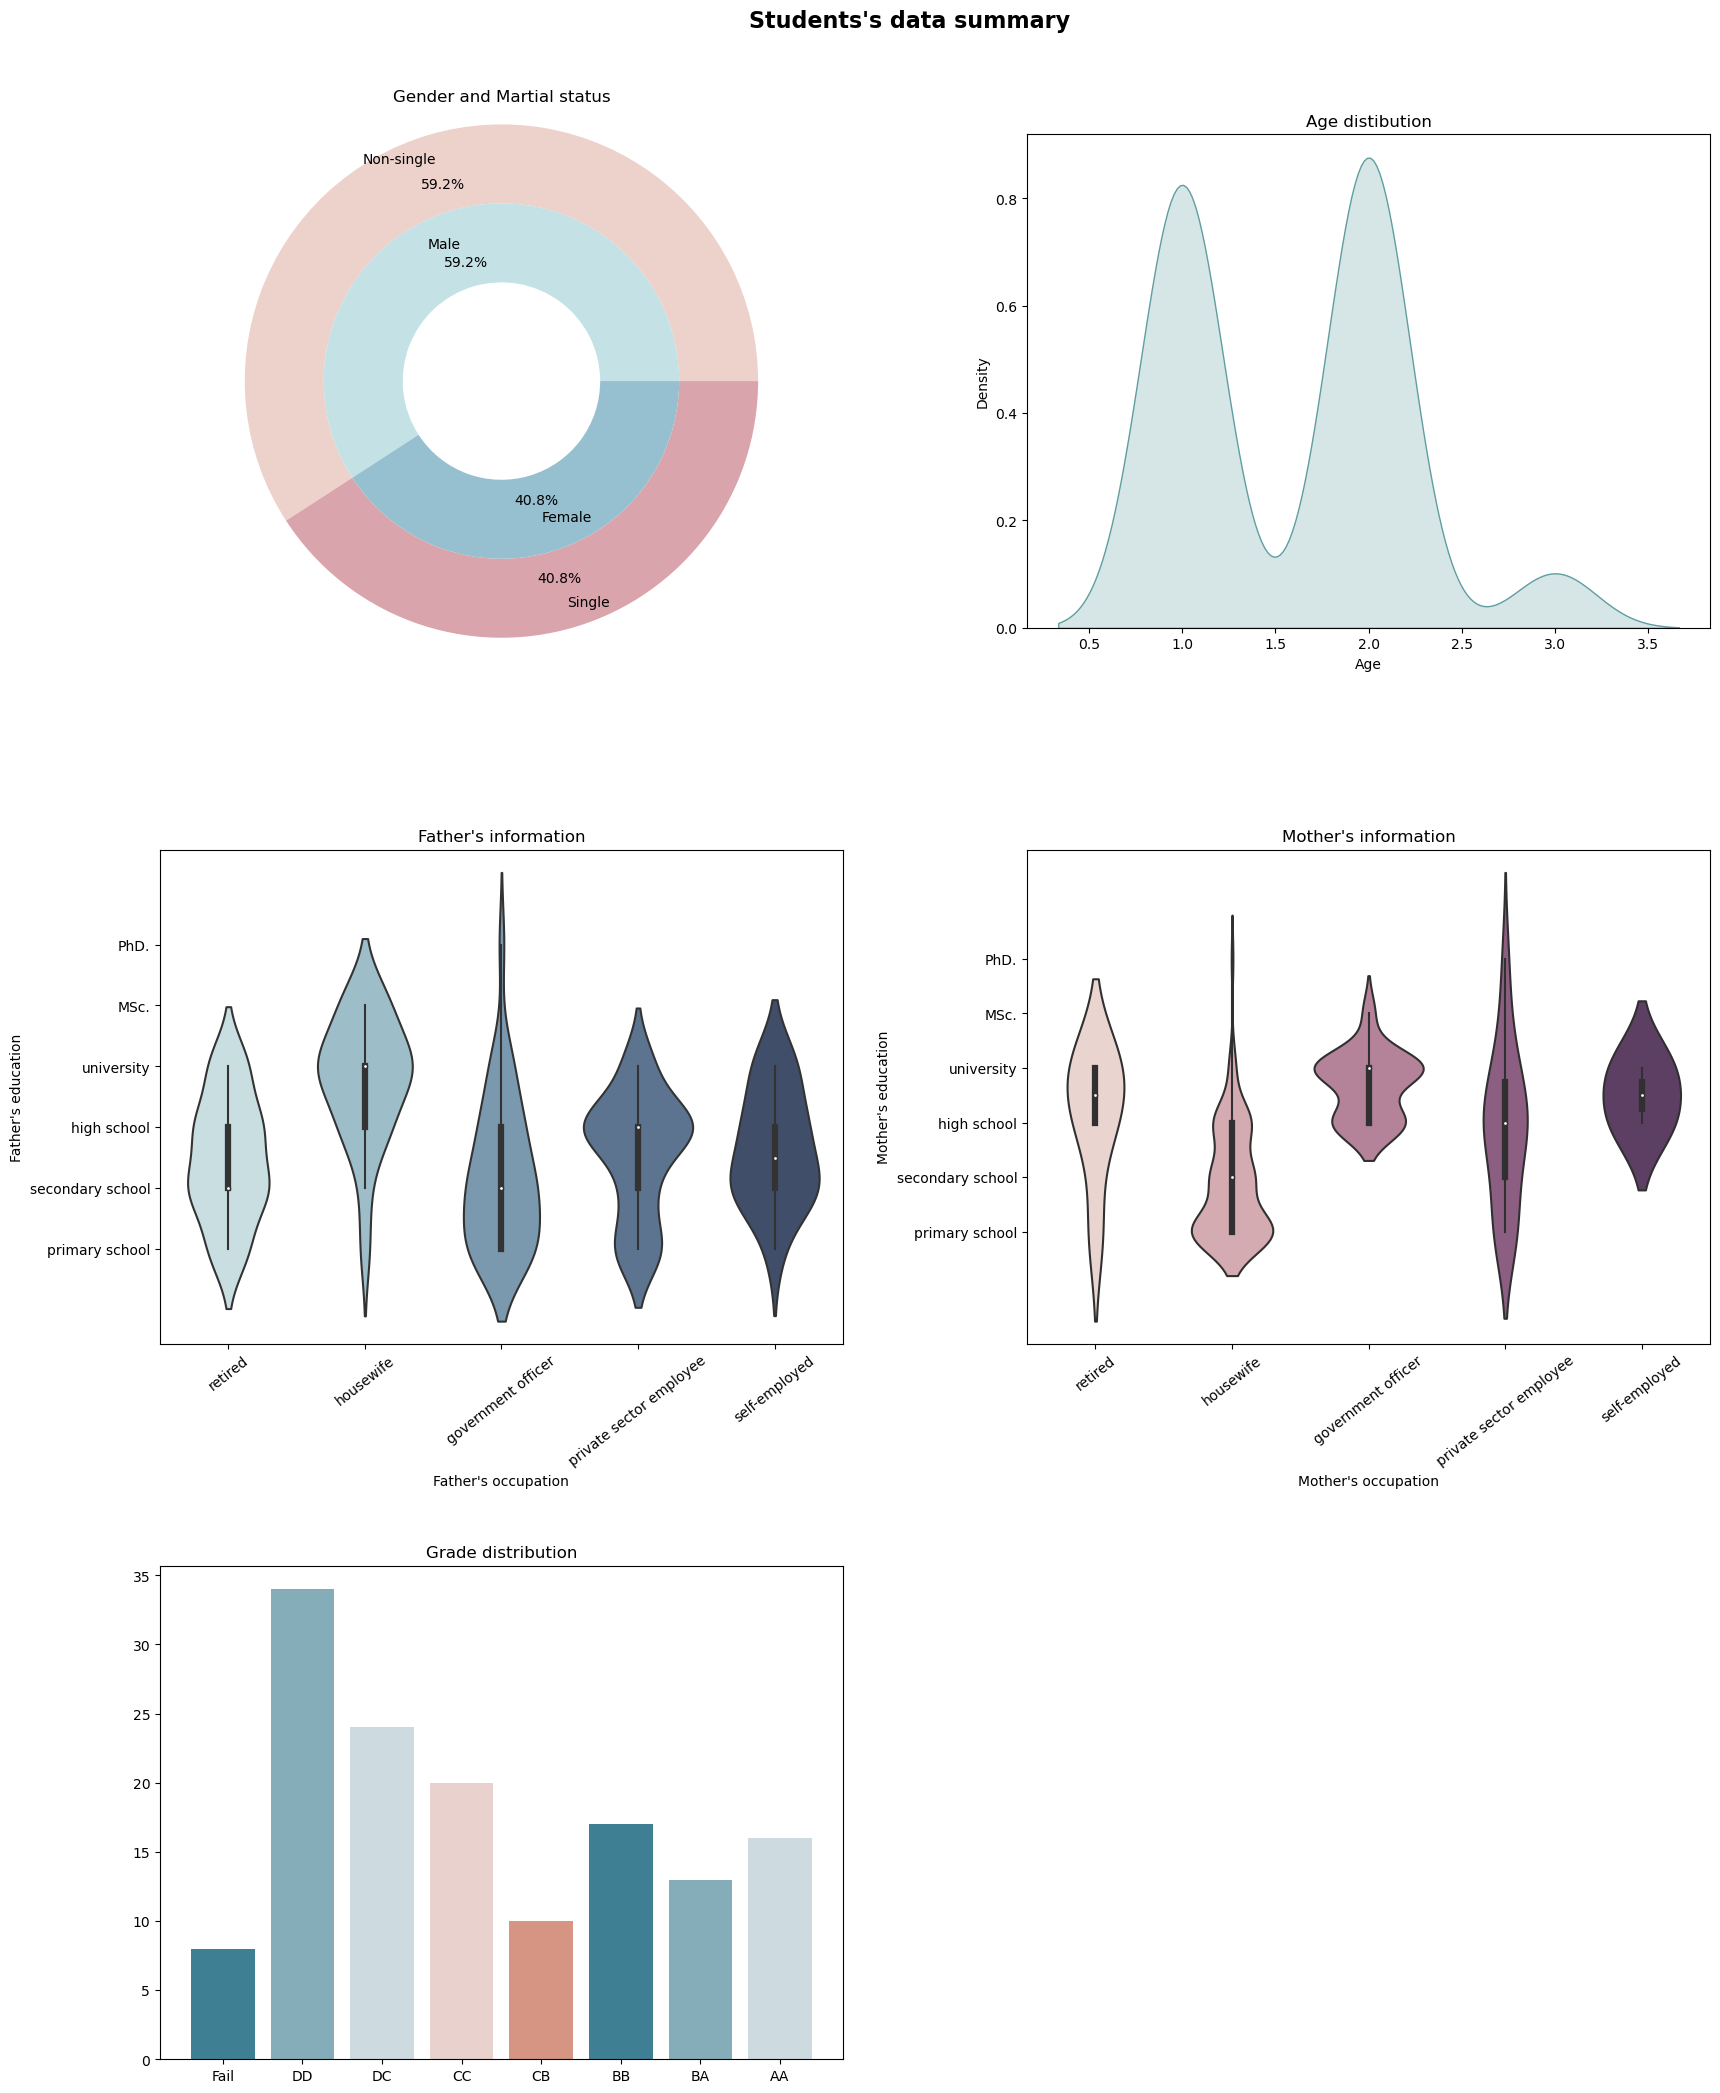

In [8]:
plt.figure(figsize=(20,25))
plt.suptitle('Students\'s data summary', y=0.93, fontsize=16, fontweight='demibold')

ax1 = plt.subplot(3, 2, 1)
ax1.pie(clean_df['Marital status'].value_counts(), radius = 1.3, labels = ['Non-single', 'Single'], colors = color1, 
        autopct='%.1f%%', pctdistance=0.8, labeldistance=0.9, wedgeprops=dict(width=0.4))
ax1.pie(clean_df['Sex'].value_counts(), radius = 1.3-0.4, labels = ['Male', 'Female'], colors = color5, 
        autopct='%.1f%%', pctdistance=0.7, labeldistance=.8, wedgeprops=dict(width=0.4))
ax1.set_title('Gender and Martial status', y = 1.05)

plt.subplot(3,2,2)
ax2 = sns.kdeplot(clean_df['Age'], fill = True, color = 'cadetblue')
ax2.set_title('Age distibution')

edu = sorted(clean_df['Father\'s education'].unique())
x_label = ['retired','housewife','government officer','private sector employee','self-employed','other']
y_label = ['primary school','secondary school','high school','university','MSc.','PhD.']

plt.subplot(3,2,3)
ax4 = sns.violinplot(x=clean_df['Father\'s occupation'], y = clean_df['Father\'s education'], palette= color5)
ax4.set_title('Father\'s information')
ax4.set_xticklabels(x_label[0:5], rotation=38)
ax4.set_yticks(edu)
ax4.set_yticklabels(y_label)
plt.subplots_adjust(wspace=0.27)

plt.subplot(3,2,4)
ax3 = sns.violinplot(x=clean_df['Mother\'s occupation'], y = clean_df['Mother\'s education'], palette= color1)
ax3.set_title('Mother\'s information')
ax3.set_xticklabels(x_label[0:5], rotation=38)
ax3.set_yticks(edu)
ax3.set_yticklabels(y_label)

grade = ['Fail', 'DD', 'DC', 'CC', 'CB', 'BB', 'BA', 'AA']
plt.subplot(3,2,5)
plt.bar(grade, clean_df['Grade'].value_counts().sort_index(), color = color6[0:5])
plt.title('Grade distribution')
plt.subplots_adjust(hspace=0.45)

plt.show()

59.7% of students in Atatürk Faculty of Education and Faculty of Engineering of Near East University are male, and 58.3% are non-single. Most of these students are in their early 20s. The majority of their parents graduated from university. While their fathers have diverse careers, their mothers are mainly housewives. Finally, fortunately, the ratio of "Fail" is lower than 6%. However, DD has the highest portion. We can infer that the majority of students aim to pass instead of excel in their studies.

### Splitting dataset & Features Selection

1. Splitting dataset & Feature selection:

In [9]:
corr_dat = clean_df.corr().reset_index()
feature_list = []

for x in range(31):
    if (abs(corr_dat['Grade'][x]) > 0.12) & (abs(corr_dat['Grade'][x])!=1):
        feature_list.append(corr_dat['index'][x])
        
print("Feature list:", feature_list)

Feature list: ['Age', 'Sex', 'Additional work', 'Total salary', 'Transportation type', 'Reading frequency(non-scientific)', 'Seminars attendance', "Projects' impact", 'Classes attendance', "Discussion's efficiency", 'Last semester cumulative GPA', 'Last semester expected cumulative GPA', 'Course ID']


In [10]:
from sklearn.model_selection import train_test_split

X = clean_df[clean_df.columns[clean_df.columns.isin(feature_list)]]
y = clean_df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

2. Logistic Regression model:  
    a. Model training:

In [11]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_train_pred_lr = lr.predict(X_train)
y_pred_lr = lr.predict(X_test)

    b. Model evaluation:

In [12]:
#Logistic Regression model evaluation
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

train_accuracy_lr = accuracy_score(y_train_pred_lr, y_train)
accuracy_lr = accuracy_score(y_pred_lr, y_test)

f1_train_lr = f1_score(y_train, y_train_pred_lr, average='micro')
f1_lr = f1_score(y_test, y_pred_lr, average='micro')

auc_train_lr = roc_auc_score(y_train, lr.predict_proba(X_train), multi_class='ovr')
auc_lr = roc_auc_score(y_test, lr.predict_proba(X_test), multi_class='ovr')

print(f'Logistic Regression Training accuracy is: {train_accuracy_lr:.3f}')
print(f'Logistic Regression Testing accuracy is: {accuracy_lr:.3f}')

print(f'\nLogistic Regression Training F-score is: {f1_train_lr:.3f}')
print(f'Logistic Regression Testing F-score is: {f1_lr:.3f}')

print(f'\nLogistic Regression Training AUC is: {auc_train_lr:.3f}')
print(f'Logistic Regression Testing AUC is: {auc_lr:.3f}')

Logistic Regression Training accuracy is: 0.487
Logistic Regression Testing accuracy is: 0.276

Logistic Regression Training F-score is: 0.487
Logistic Regression Testing F-score is: 0.276

Logistic Regression Training AUC is: 0.873
Logistic Regression Testing AUC is: 0.641


    c. Hyper-parameter Tuning:

In [13]:
#Hyper-parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

lr = LogisticRegression(max_iter=3000)
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
param_grid = [{'penalty' : ['l1', 'l2'],
               'C' : param_range}]

gs = GridSearchCV(estimator=lr,      
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(f'Logistic Regression best model accuracy: {gs.best_score_:.3f}')

print(gs.best_params_)

best_classifier = gs.best_estimator_
lr_best_score = best_classifier.score(X_test, y_test)

print(f'Logistic Regression best model Test accuracy: {best_classifier.score(X_test, y_test):.3f}')

Logistic Regression best model accuracy: 0.274
{'C': 1.0, 'penalty': 'l2'}
Logistic Regression best model Test accuracy: 0.241


3. Multi-layer Perceptron model:  
a. Model training:

In [14]:
from sklearn.neural_network import MLPClassifier

X = clean_df[clean_df.columns[clean_df.columns.isin(feature_list)]]
y = clean_df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=142, hidden_layer_sizes=(3,3))
mlp.fit(X_train, y_train)
y_train_pred_mlp = mlp.predict(X_train)
y_pred_mlp = mlp.predict(X_test)

    b. Model evaluation:

In [15]:
#Multi-layer Perceptron model evaluation
train_accuracy_mlp = accuracy_score(y_train_pred_mlp, y_train)
accuracy_mlp = accuracy_score(y_pred_mlp, y_test)

f1_train_mlp = f1_score(y_train, y_train_pred_mlp, average='micro')
f1_mlp = f1_score(y_test, y_pred_mlp, average='micro')

auc_train_mlp = roc_auc_score(y_train, mlp.predict_proba(X_train), multi_class='ovr')
auc_mlp = roc_auc_score(y_test, mlp.predict_proba(X_test), multi_class='ovr')

print(f'Multi-layer Perceptron Training accuracy is: {train_accuracy_mlp:.3f}')
print(f'Multi-layer Perceptron Testing accuracy is: {accuracy_mlp:.3f}')

print(f'\nMulti-layer Perceptron Training F-score is: {f1_train_mlp:.3f}')
print(f'Multi-layer Perceptron Testing F-score is: {f1_mlp:.3f}')

print(f'\nMulti-layer Perceptron Training AUC is: {auc_train_mlp:.3f}')
print(f'Multi-layer Perceptron Testing AUC is: {auc_mlp:.3f}')

Multi-layer Perceptron Training accuracy is: 0.310
Multi-layer Perceptron Testing accuracy is: 0.207

Multi-layer Perceptron Training F-score is: 0.310
Multi-layer Perceptron Testing F-score is: 0.207

Multi-layer Perceptron Training AUC is: 0.718
Multi-layer Perceptron Testing AUC is: 0.654


    c. Hyper-parameter tuning:

In [16]:
#Hyper-parameter tuning
mlp = MLPClassifier(max_iter=10000, solver='lbfgs')
param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10, 100]
param_grid = [{'alpha' : param_range}]

gs = GridSearchCV(estimator=mlp,      
                  param_grid=param_grid,
                  scoring = 'accuracy',
                  cv=10,
                  n_jobs=-1)


gs = gs.fit(X_train, y_train)
print(f'Multi-layer Perceptron best model accuracy: {gs.best_score_:.3f}')

print(gs.best_params_)

best_classifier = gs.best_estimator_
mlp_best_score = best_classifier.score(X_test, y_test)

print(f'Multi-layer Perceptron best model Test accuracy: {best_classifier.score(X_test, y_test):.3f}')

Multi-layer Perceptron best model accuracy: 0.282
{'alpha': 1.0}
Multi-layer Perceptron best model Test accuracy: 0.103


**Models' Performance**

In [17]:
d = {'Optimised classification model': ['Logistic Regression', 'Multi-layer Perceptron'], 
     'Test accuracy': [lr_best_score, mlp_best_score]}
model_performance = pd.DataFrame(data=d)
model_performance

,Optimised classification model,accuracy
0,Logistic Regression,0.241379
1,Multi-layer Perceptron,0.103448


The optimised Multi-layer Perceptron (MLP) model is expected to outperform the optimised Logistic Regression model as this model is more complicated, however, test accuracy shows that Logistic Regression is better. Nonetheless, both classifiers are inappropriate for predicting the students' performance as all test accuracy figures are below 0.25, which is not ideal. In conclusion, it is not yet possible to determine which factors affect higher education student's performance at Near East University.